In [134]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore")

%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline

In [2]:
# create a dataframe
vans_df = pd.read_csv('clean_data_v4.csv')

# Unnamed: 0 is a weird columns and I don't know why it's there. Other refers to van models that are not Sprinters, Promasters, or Transits, and I am dropping it to avoid the DVT.
vans_df.drop(columns=['Unnamed: 0','Other'], inplace=True)

# keep only numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
vans = vans_df.select_dtypes(include=numerics)

# create features and target variables
x1 = vans.drop(columns=['Price', 'Wheel Base Length'])
x1 = sm.add_constant(x1)
y1 = vans['Price']

len(y1)

593

In [3]:
#create first model
model = sm.OLS(y1,x1)
vans_model1 = model.fit()
vans_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     30.91
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.46e-128
Time:                        13:42:07   Log-Likelihood:                -6791.7
No. Observations:                 593   AIC:                         1.369e+04
Df Residuals:                     541   BIC:                         1.392e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.542e+06   4.72e+05     -7.503      0.000   -4.47e+06   -2.61e+06
Manufacturing Year              1793.5566    235.419      7.619      0.000    1331.109    2256.004
Mileage                           -0.2156      0.021    -10.463      0.000      -0.256      -0.175
Fuel Efficiency (Highway)        273.0199    479.494      0.569      0.569    -668.878    1214.917
Number of Seats with Seatbelts  -390.6508    697.911     -0.560      0.576   -1761.598     980.296
Sleeping Capacity               2367.6703   1090.481      2.171      0.030     225.575    4509.766
Air Bags                       -3359.2033   4326.867     -0.776      0.438   -1.19e+04    5140.314
Air Conditioner                 2063.6044   2231.310      0.925      0.355   -2319.488    6446.697
Audio System                   -4393.0133   2947.658     -1.490      0.137   -1.02e+04    1397.244
Backup Camera                  -4426.4842   3431.833     -1.290      0.198   -1.12e+04    2314.867
Bluetooth / Wifi                3317.1170   2545.491      1.303      0.193   -1683.140    8317.374
Electric windows                 -97.5360   2685.046     -0.036      0.971   -5371.929    5176.857
Exterior Lights                  194.5735   2498.090      0.078      0.938   -4712.572    5101.719
Fresh Water Tank (Portable)    -6279.5980   2474.214     -2.538      0.011   -1.11e+04   -1419.354
Generator                      -3505.6890   4407.226     -0.795      0.427   -1.22e+04    5151.683
Grey / Black Water Tanks        1895.2932   2739.283      0.692      0.489   -3485.641    7276.227
Heater / Furnace                6527.4231   2389.786      2.731      0.007    1833.026    1.12e+04
Inverter                        -882.7224   3391.039     -0.260      0.795   -7543.939    5778.494
Refrigerator                    2523.6531   3831.221      0.659      0.510   -5002.240       1e+04
Roof Fan                        1589.6511   3256.102      0.488      0.626   -4806.500    7985.802
Roof Rack                       3869.8742   2310.076      1.675      0.094    -667.944    8407.692
Shower (Outdoor)                4201.5818   4080.645      1.030      0.304   -3814.269    1.22e+04
Sink                            8479.3750   4337.164      1.955      0.051     -40.370     1.7e+04
Solar                           2539.0486   3778.316      0.672      0.502   -4882.920    9961.017
Toilet                          3750.2652   2632.579      1.425      0.155   -1421.064    8921.594
USB port                       -1070.6514   3175.748     -0.337      0.736   -7308.959    5167.656
Water Heater                    6695.2891   3159.472      2.119      0.035     488.953    1.29e+04
Water Pump                      4105.5950   3661.837      1.121      0.263   -3087.566    1.13e+04
Fresh Water Ta

In [40]:
# investigate VIF values

vif = pd.DataFrame()
vif['variable'] = x1.columns
vif['vif'] =[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif

,variable,vif
0,const,217648.709249
1,Manufacturing Year,3.374903
2,Mileage,1.754702
3,Fuel Efficiency (Highway),1.098584
4,Number of Seats with Seatbelts,1.412489
5,Sleeping Capacity,1.282030
6,Air Bags,1.709935
7,Air Conditioner,1.237061
8,Audio System,1.367123
9,Backup Camera,1.777359


### I need to figure out which variables to drop.

In [5]:
p_vals = vans_model1.pvalues

#p_vals

In [6]:
drop_these = ['Fuel Efficiency (Highway)','Number of Seats with Seatbelts','Air Bags','Air Conditioner','Audio System','Backup Camera','Bluetooth / Wifi','Electric windows','Exterior Lights','Generator',
             'Grey / Black Water Tanks','Inverter','Refrigerator','Roof Fan','Roof Rack','Shower (Outdoor)','Solar','Toilet','USB port','Water Pump','Fresh Water Tank (Built-in)','Stove','Towing Package',
             'Heated seats','Cooler','Security System','Oven','Skylight','Bike Rack','Child Seat','TV','Shower','Wheel Base Length']

#for i in p_vals.values:
#    if i > 0.1:
#        drop_these.append(i)

In [7]:
x2 = vans.drop(columns=drop_these)
x2 = sm.add_constant(x2)

In [8]:
model2 = sm.OLS(y1,x2)
vans_model2 = model2.fit()
vans_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.863e+30
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:42:08   Log-Likelihood:                 12603.
No. Observations:                 593   AIC:                        -2.516e+04
Df Residuals:                     572   BIC:                        -2.507e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.736e-09   2.55e-09      1.073      0.284   -2.27e-09    7.74e-09
Price                           1.0000   2.53e-16   3.95e+15      0.000       1.000       1.000
Manufacturing Year          -1.421e-12   1.27e-12     -1.120      0.263   -3.91e-12    1.07e-12
Mileage                      -7.98e-17   1.32e-16     -0.603      0.547    -3.4e-16     1.8e-16
Sleeping Capacity           -4.547e-13   6.19e-12     -0.073      0.941   -1.26e-11    1.17e-11
Fresh Water Tank (Portable)  4.547e-13   1.32e-11      0.034      0.973   -2.55e-11    2.64e-11
Heater / Furnace             4.547e-12   1.39e-11      0.326      0.744   -2.28e-11    3.19e-11
Sink                         4.547e-13   1.95e-11      0.023      0.981   -3.79e-11    3.88e-11
Water Heater                         0   1.66e-11          0      1.000   -3.25e-11    3.25e-11
Shower (Indoor)             -1.819e-12   1.72e-11     -0.106      0.916   -3.55e-11    3.19e-11
Offroad Lights               3.638e-12    1.8e-11      0.202      0.840   -3.18e-11    3.91e-11
Awning                       2.728e-12    1.6e-11      0.171      0.864   -2.86e-11    3.41e-11
Offroad Tires                1.819e-12   1.49e-11      0.122      0.903   -2.75e-11    3.11e-11
Suspension Mods             -3.638e-12   1.85e-11     -0.196      0.845   -4.01e-11    3.28e-11
Tow Winch                    5.457e-12    2.2e-11      0.249      0.804   -3.77e-11    4.86e-11
Propane                      7.276e-12   1.35e-11      0.541      0.589   -1.92e-11    3.37e-11
Microwave                   -8.185e-12   1.95e-11     -0.420      0.674   -4.64e-11    3.01e-11
Fuel (Code)                  4.547e-12   1.96e-11      0.232      0.817   -3.39e-11     4.3e-11
Sprinter                    -5.457e-12    2.3e-11     -0.237      0.813   -5.06e-11    3.97e-11
Promaster                    4.547e-12   2.36e-11      0.193      0.847   -4.18e-11    5.09e-11
Transit                     -2.728e-12   2.49e-11     -0.109      0.913   -5.17e-11    4.63e-11
==============================================================================
Omnibus:                       22.218   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.900
Skew:                           0.217   Prob(JB):                     4.83e-10
Kurtosis:                       4.244   Cond. No.                     4.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#sns.pairplot(x2)
#plt.show()

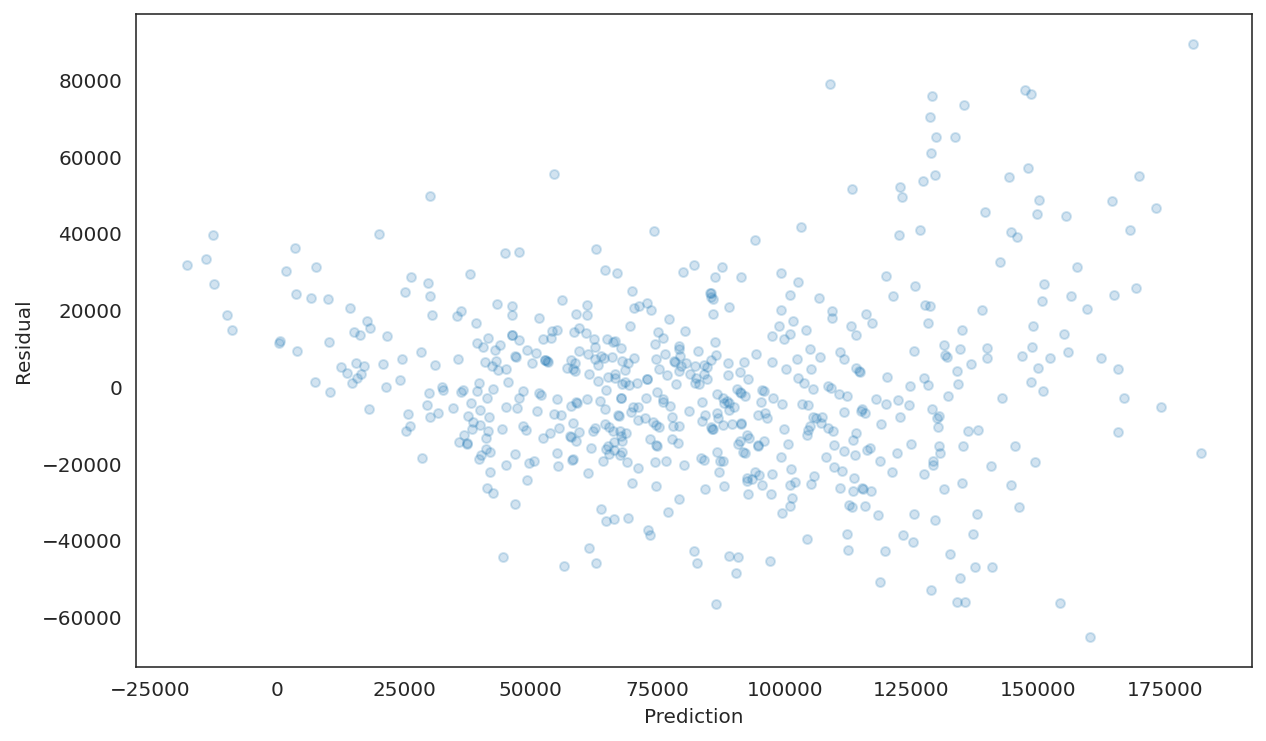

In [10]:
## make a residual plot

vans_df['Prediction']=vans_model1.predict(x1)
vans_df['Residual']=vans_df['Price']-vans_df['Prediction']
with sns.axes_style('white'):
    plot=vans_df.plot(kind='scatter',
                  x='Prediction',y='Residual',alpha=0.2,figsize=(10,6))

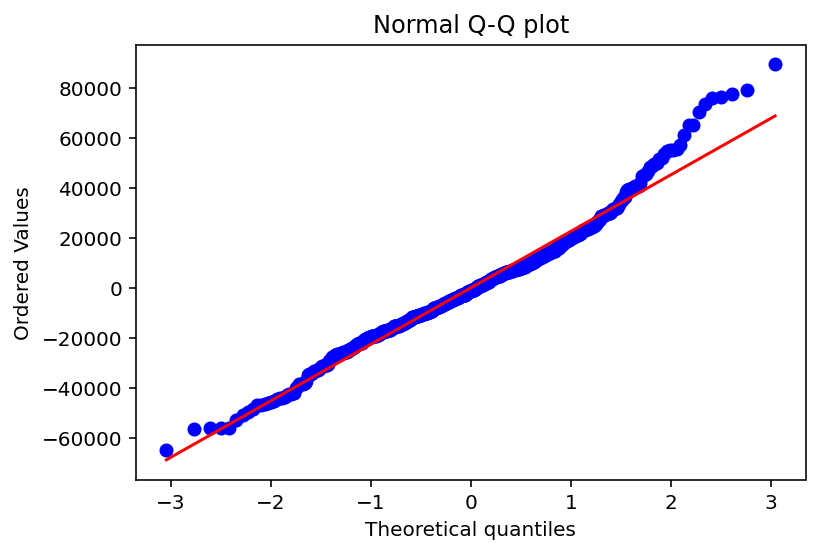

In [11]:
# diagnose/inspect residual normality using qqplot:

stats.probplot(vans_df['Residual'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [12]:
# try log(y)

log_y = np.log(y1)
log_model1 = sm.OLS(log_y, x1)
log_vans_model1 = log_model1.fit()
log_vans_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     26.37
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.06e-115
Time:                        13:42:09   Log-Likelihood:                -237.12
No. Observations:                 593   AIC:                             578.2
Df Residuals:                     541   BIC:                             806.3
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -62.0382      7.474     -8.300      0.000     -76.720     -47.356
Manufacturing Year                 0.0361      0.004      9.686      0.000       0.029       0.043
Mileage                         -2.55e-06   3.26e-07     -7.815      0.000   -3.19e-06   -1.91e-06
Fuel Efficiency (Highway)          0.0052      0.008      0.685      0.494      -0.010       0.020
Number of Seats with Seatbelts    -0.0172      0.011     -1.558      0.120      -0.039       0.004
Sleeping Capacity                  0.0376      0.017      2.176      0.030       0.004       0.071
Air Bags                           0.0089      0.069      0.130      0.897      -0.126       0.143
Air Conditioner                    0.0273      0.035      0.773      0.440      -0.042       0.097
Audio System                      -0.0140      0.047     -0.301      0.764      -0.106       0.078
Backup Camera                     -0.0776      0.054     -1.428      0.154      -0.184       0.029
Bluetooth / Wifi                   0.0834      0.040      2.070      0.039       0.004       0.163
Electric windows                   0.0066      0.043      0.156      0.876      -0.077       0.090
Exterior Lights                    0.0361      0.040      0.913      0.362      -0.042       0.114
Fresh Water Tank (Portable)       -0.0652      0.039     -1.665      0.097      -0.142       0.012
Generator                         -0.0664      0.070     -0.951      0.342      -0.203       0.071
Grey / Black Water Tanks          -0.0214      0.043     -0.493      0.622      -0.107       0.064
Heater / Furnace                   0.0769      0.038      2.032      0.043       0.003       0.151
Inverter                          -0.0437      0.054     -0.814      0.416      -0.149       0.062
Refrigerator                       0.1852      0.061      3.052      0.002       0.066       0.304
Roof Fan                           0.0633      0.052      1.229      0.220      -0.038       0.165
Roof Rack                          0.0276      0.037      0.755      0.450      -0.044       0.099
Shower (Outdoor)                   0.0854      0.065      1.322      0.187      -0.042       0.212
Sink                               0.0638      0.069      0.929      0.353      -0.071       0.199
Solar                              0.0295      0.060      0.492      0.623      -0.088       0.147
Toilet                             0.0796      0.042      1.911      0.057      -0.002       0.162
USB port                           0.0574      0.050      1.142      0.254      -0.041       0.156
Water Heater                       0.1167      0.050      2.333      0.020       0.018       0.215
Water Pump                         0.0924      0.058      1.593      0.112      -0.022       0.206
Fresh Water Ta

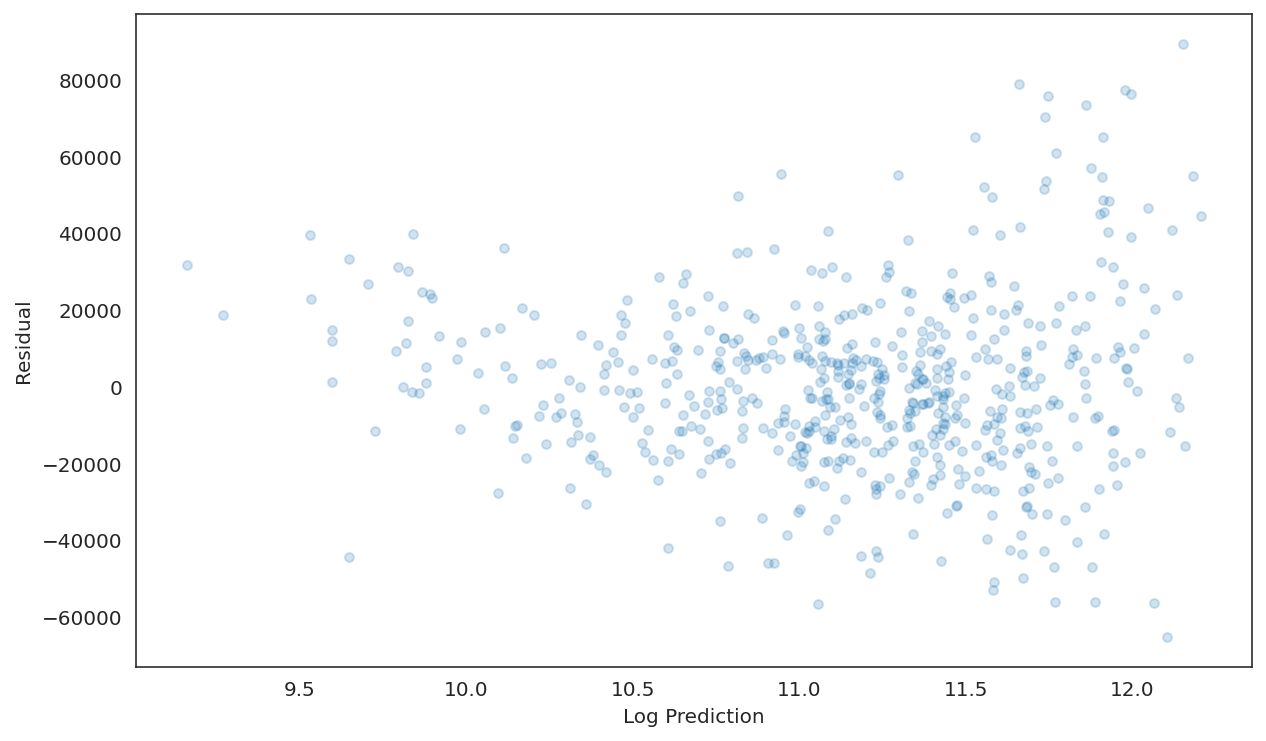

In [13]:
## make a residual plot of log_y

vans_df['Log Prediction']=log_vans_model1.predict(x1)
vans_df['Log Residual']=vans_df['Price']-vans_df['Log Prediction']
with sns.axes_style('white'):
    plot=vans_df.plot(kind='scatter',
                  x='Log Prediction',y='Residual',alpha=0.2,figsize=(10,6))

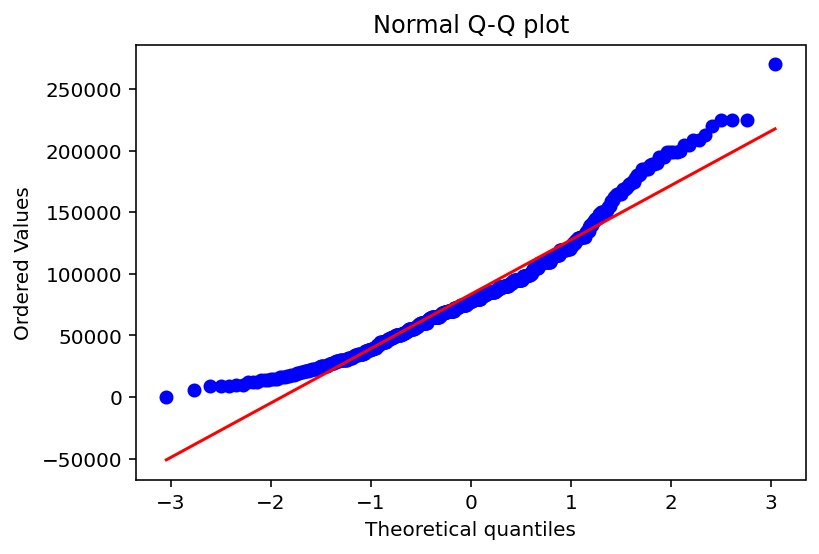

In [14]:
# diagnose/inspect residual normality of log_y using qqplot:

stats.probplot(vans_df['Log Residual'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Cross Validation

In [15]:
# split the data 80/20 

x1, X1_test, y1, Y1_test = train_test_split(x1, y1, test_size=.2, random_state=42)

In [16]:
# fit model to training set

model2 = LinearRegression()
lr = model2.fit(x1,y1)

r_squared_train = lr.score(x1, y1)
r_squared_test = lr.score(X1_test, Y1_test)

print(f'R^2 for the training data is {r_squared_train}')
print(f'R^2 for the test data is {r_squared_test}')
print(f'The difference is {r_squared_train - r_squared_test}. This model is very overfit.')

R^2 for the training data is 0.7523934097807614
R^2 for the test data is 0.6705435033053859
The difference is 0.08184990647537549. This model is very overfit.


### I really need to figure out which features need to be dropped.

Then I can re-rerun some cross-validation techniques to determine the fit-ness of my model.

- [x] Look seriously at the p-values of variables above 0.1 or 0.05, factor in domain knowledge about the feature when considering dropping.
- [x] Rerun model after dropping the problematic variables
- [x] Create a pairplot and covariance matrix of features
- [ ] Apply RMSE or MAE metrics
- [ ] Take a look at Lasso Regularization
- [x] Dummy variables for each make of van (Sprinter, Promaster, Transit, Other)
- [ ] Group location by state region

<AxesSubplot:>

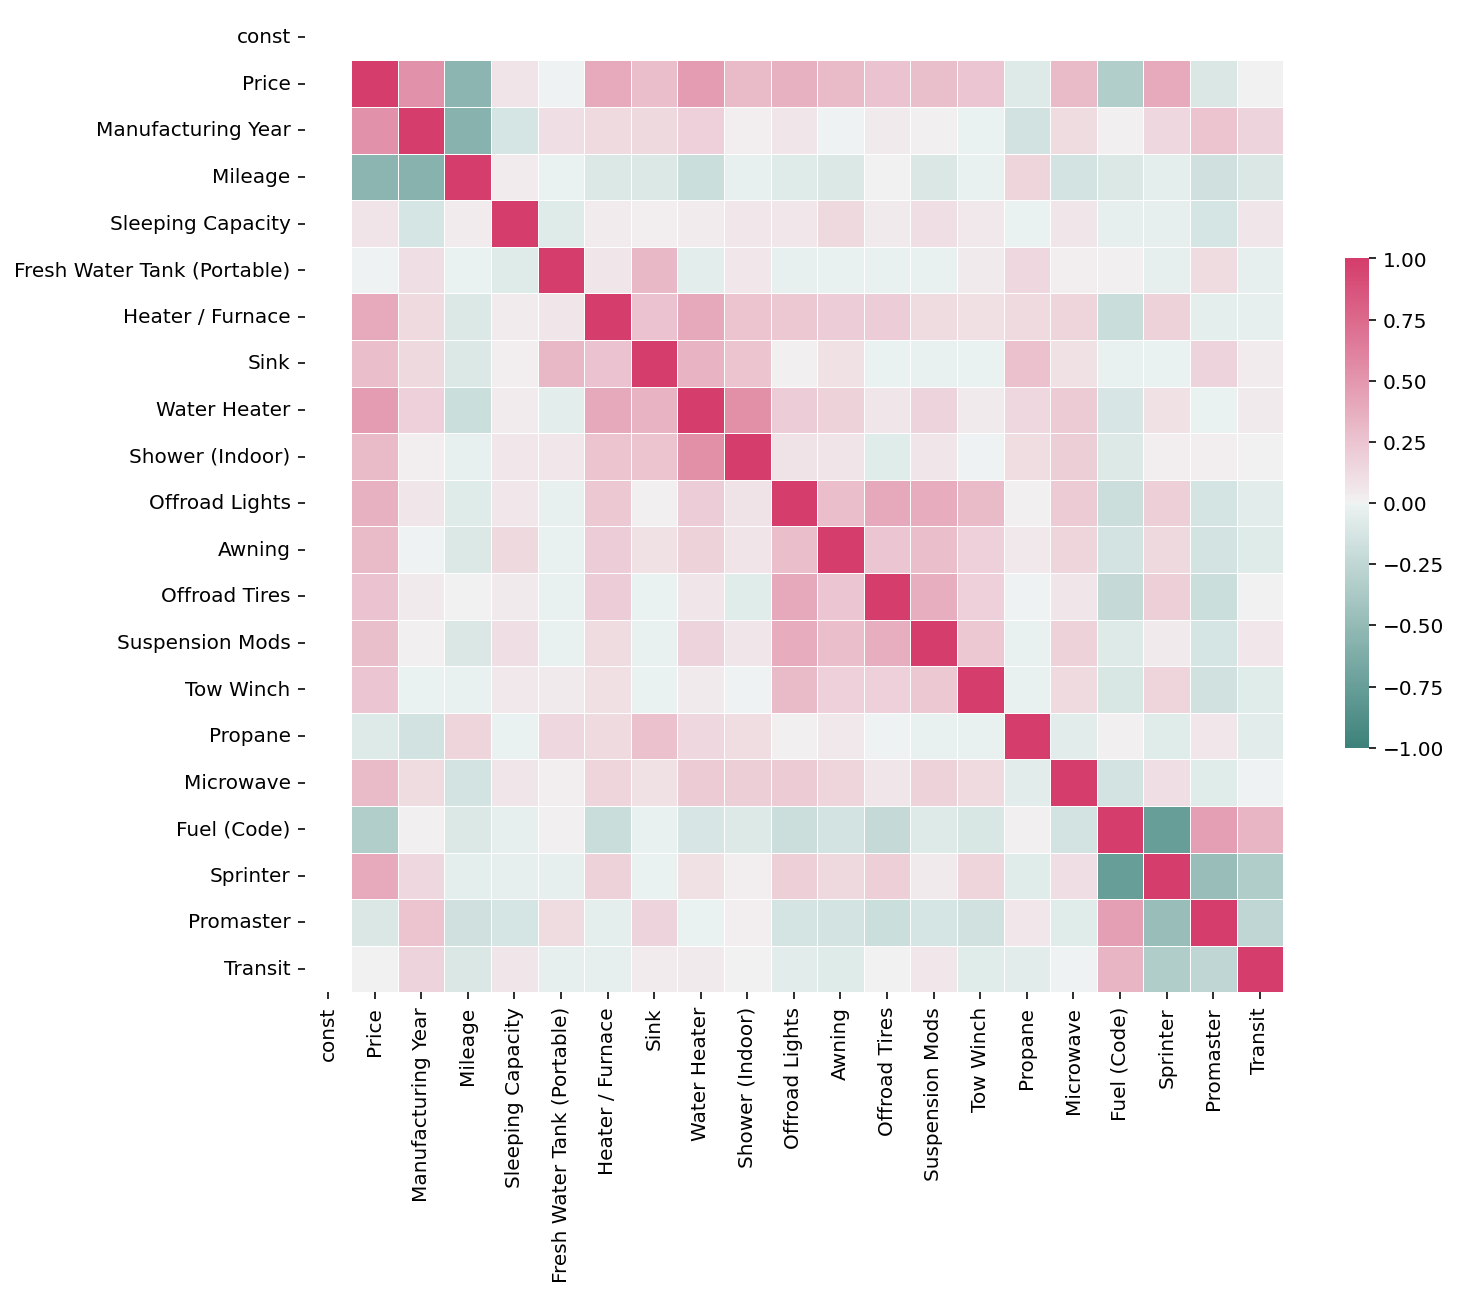

In [17]:
correlation = x2.corr()

#mask = np.triu(np.ones_like(correlation, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(180, 359, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Lasso Regularization

In [18]:
len(y1)

474

In [19]:
# lassoing the subset of features that remained after p-val purge (features named in 'drop_these' are not present)
y2 = vans['Price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2,random_state=42)

## .fit finds the mean and standard deviation of each variable in the training set
std2 = StandardScaler()
std2.fit(X_train2.values)

## apply the scaler to the train set
X_tr2 = std2.transform(X_train2.values)

## Apply the scaler to the test set
X_te2 = std2.transform(X_test2.values)
lasso2 = Lasso(alpha = 5000)
lasso2.fit(X_tr2, y_train2)
test_r_squared2 = lasso2.score(X_te2, y_test2)
print(test_r_squared2)
print(list(zip(X_train2.columns, lasso2.coef_)))

0.9882151868686629
[('const', 0.0), ('Price', 41059.59179335243), ('Manufacturing Year', 0.0), ('Mileage', -0.0), ('Sleeping Capacity', 0.0), ('Fresh Water Tank (Portable)', 0.0), ('Heater / Furnace', 0.0), ('Sink', 0.0), ('Water Heater', 0.0), ('Shower (Indoor)', 0.0), ('Offroad Lights', 0.0), ('Awning', 0.0), ('Offroad Tires', 0.0), ('Suspension Mods', 0.0), ('Tow Winch', 0.0), ('Propane', -0.0), ('Microwave', 0.0), ('Fuel (Code)', -0.0), ('Sprinter', 0.0), ('Promaster', -0.0), ('Transit', 0.0)]


In [20]:
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr2, y_train2)
r_squared_train2 = lasso_model.score(X_tr2, y_train2)
r_squared_test2 = lasso_model.score(X_te2, y_test2)
alpha2 = lasso_model.alpha_

print(r_squared_train2)
print(r_squared_test2)
print(alpha2)

0.9999999999999528
0.9999999999999528
0.01


In [21]:
# lassoing all of the features

X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.2,random_state=42)

## .fit finds the mean and standard deviation of each variable in the training set
std2 = StandardScaler()
std2.fit(X_train2.values)

## apply the scaler to the train set
X_tr2 = std2.transform(X_train2.values)

## Apply the scaler to the test set
X_te2 = std2.transform(X_test2.values)
lasso2 = Lasso(alpha = 5000)
lasso2.fit(X_tr2, y_train2)
test_r_squared2 = lasso2.score(X_te2, y_test2)
print(test_r_squared2)
features_to_use = (list(zip(X_train2.columns, lasso2.coef_)))

0.6274222341650844


In [22]:
features_for_x3 = []

for i in features_to_use:
    if i[1] > 0:
        features_for_x3.append(i[0]) 

In [38]:
features_for_x3

['Manufacturing Year',
 'Heater / Furnace',
 'Roof Rack',
 'Water Heater',
 'Water Pump',
 'Fresh Water Tank (Built-in)',
 'Shower (Indoor)',
 'Offroad Lights',
 'Awning',
 'Offroad Tires',
 'Security System',
 'Suspension Mods',
 'Shower',
 'Sprinter',
 'Price',
 'Fuel (Code)']

In [24]:
alphas = 10**np.linspace(-2,2,200)
lasso_model2 = LassoCV(alphas = alphas, cv=5)
lasso_model2.fit(X_tr2, y_train2)
r_squared_train2 = lasso_model2.score(X_tr2, y_train2)
r_squared_test2 = lasso_model2.score(X_te2, y_test2)
alpha2 = lasso_model2.alpha_

print(r_squared_train2)
print(r_squared_test2)
print(alpha2)

0.7463160007983072
0.7396898017084018
100.0


In [132]:
# visualize lassoing of x1 features

n_alphas = 4000
min_alpha_exp = -2
max_alpha_exp = 6
n_features = len(x1.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(x1,y1)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

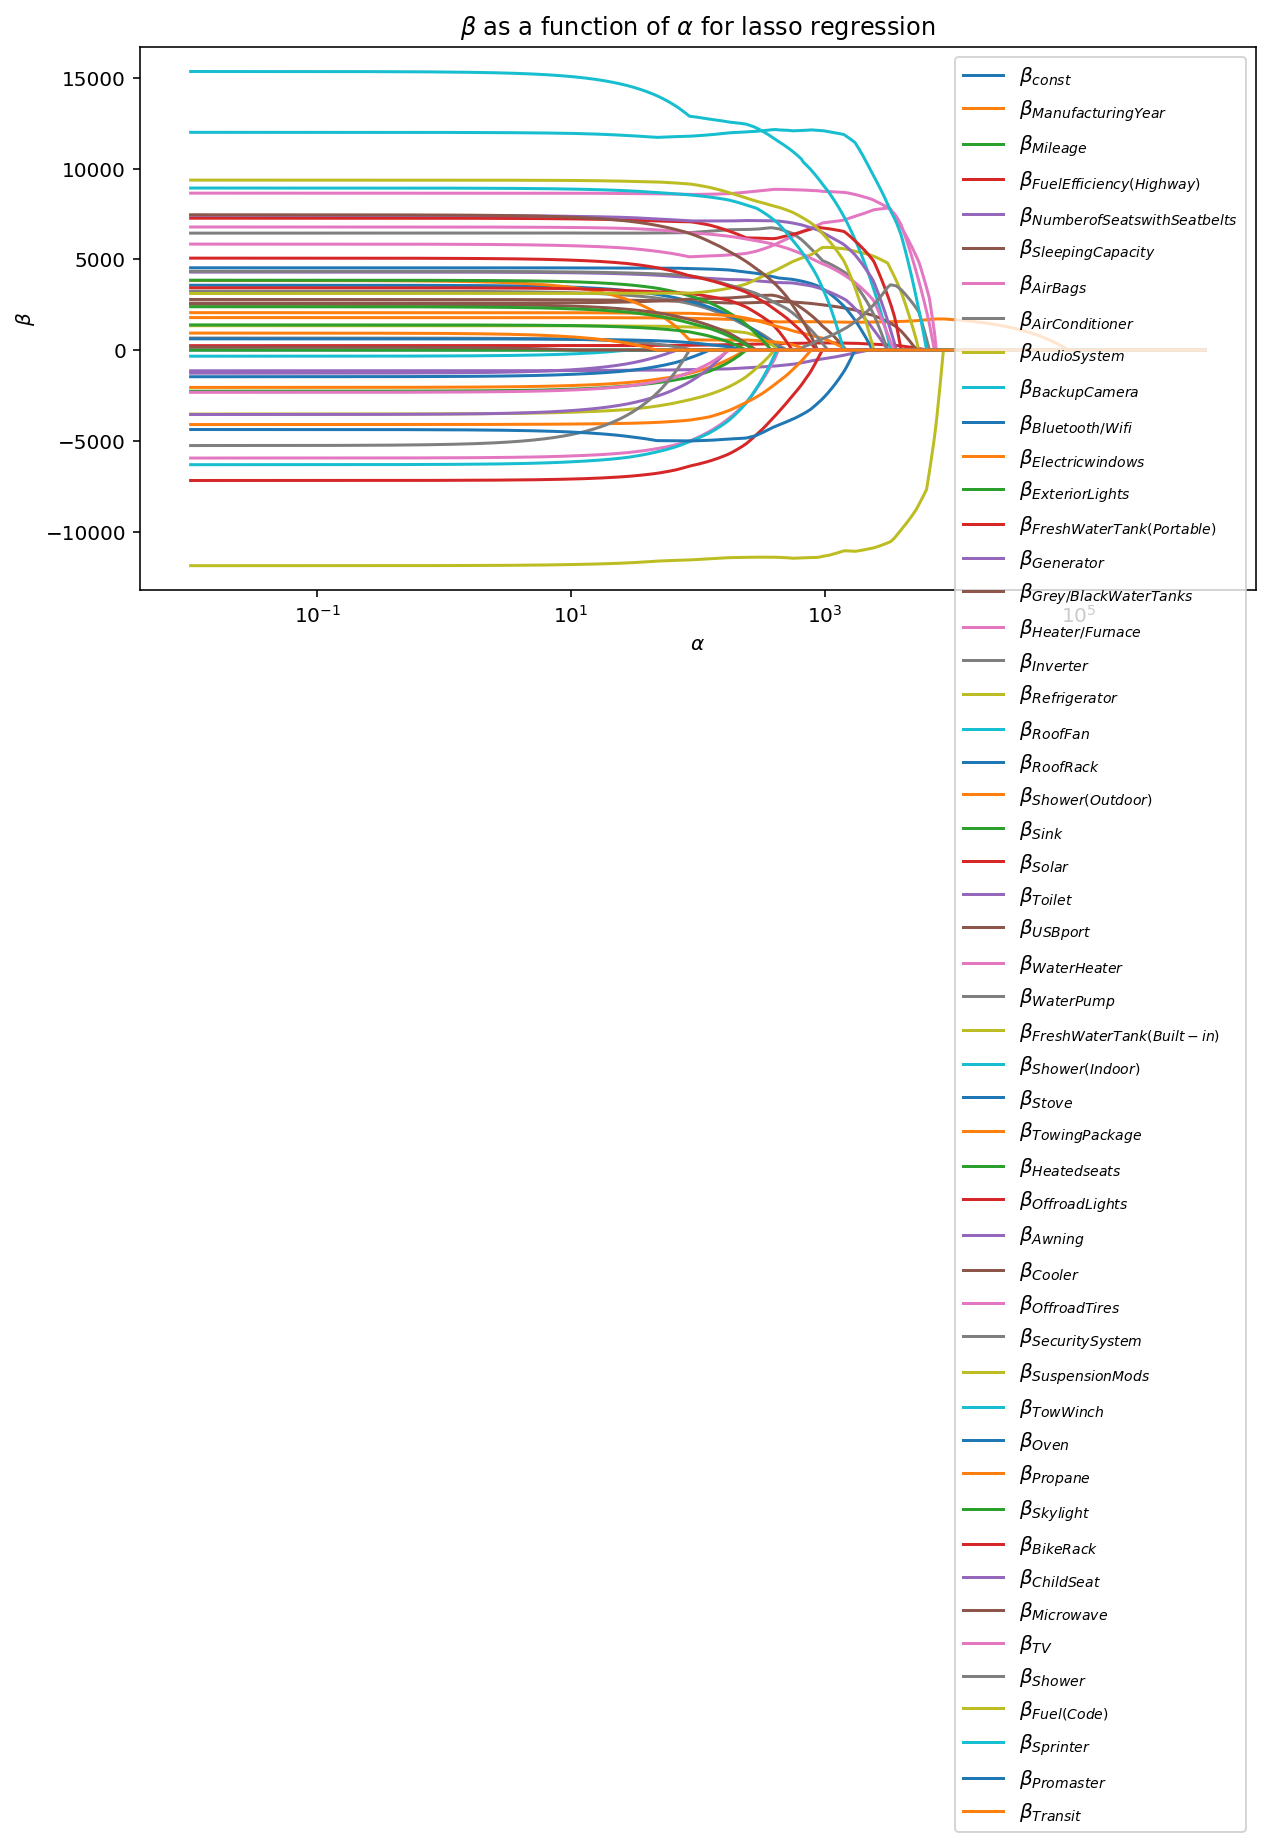

In [135]:
columns = list(x1.columns)
fig, ax = plt.subplots(figsize=(10,5))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [28]:
x3 = vans[features_for_x3]

In [125]:
features_for_x3.append('Price')
features_for_x3.append('Fuel (Code)')
features_for_x3.append('Mileage')
features_for_x3.append('Sleeping Capacity')
features_for_x3.append('Manufacturing Year')

In [126]:
x3_pair = vans[features_for_x3]

In [127]:
x3_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturing Year           593 non-null    int64  
 1   Heater / Furnace             593 non-null    int64  
 2   Roof Rack                    593 non-null    int64  
 3   Water Heater                 593 non-null    int64  
 4   Water Pump                   593 non-null    int64  
 5   Fresh Water Tank (Built-in)  593 non-null    int64  
 6   Shower (Indoor)              593 non-null    int64  
 7   Offroad Lights               593 non-null    int64  
 8   Awning                       593 non-null    int64  
 9   Offroad Tires                593 non-null    int64  
 10  Security System              593 non-null    int64  
 11  Suspension Mods              593 non-null    int64  
 12  Shower                       593 non-null    int64  
 13  Sprinter            

In [128]:
pairplot_test = sns.pairplot(x3_pair, hue='Fuel (Code)', palette ='viridis')

pairplot_test.savefig('big_pairplot.png')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:>

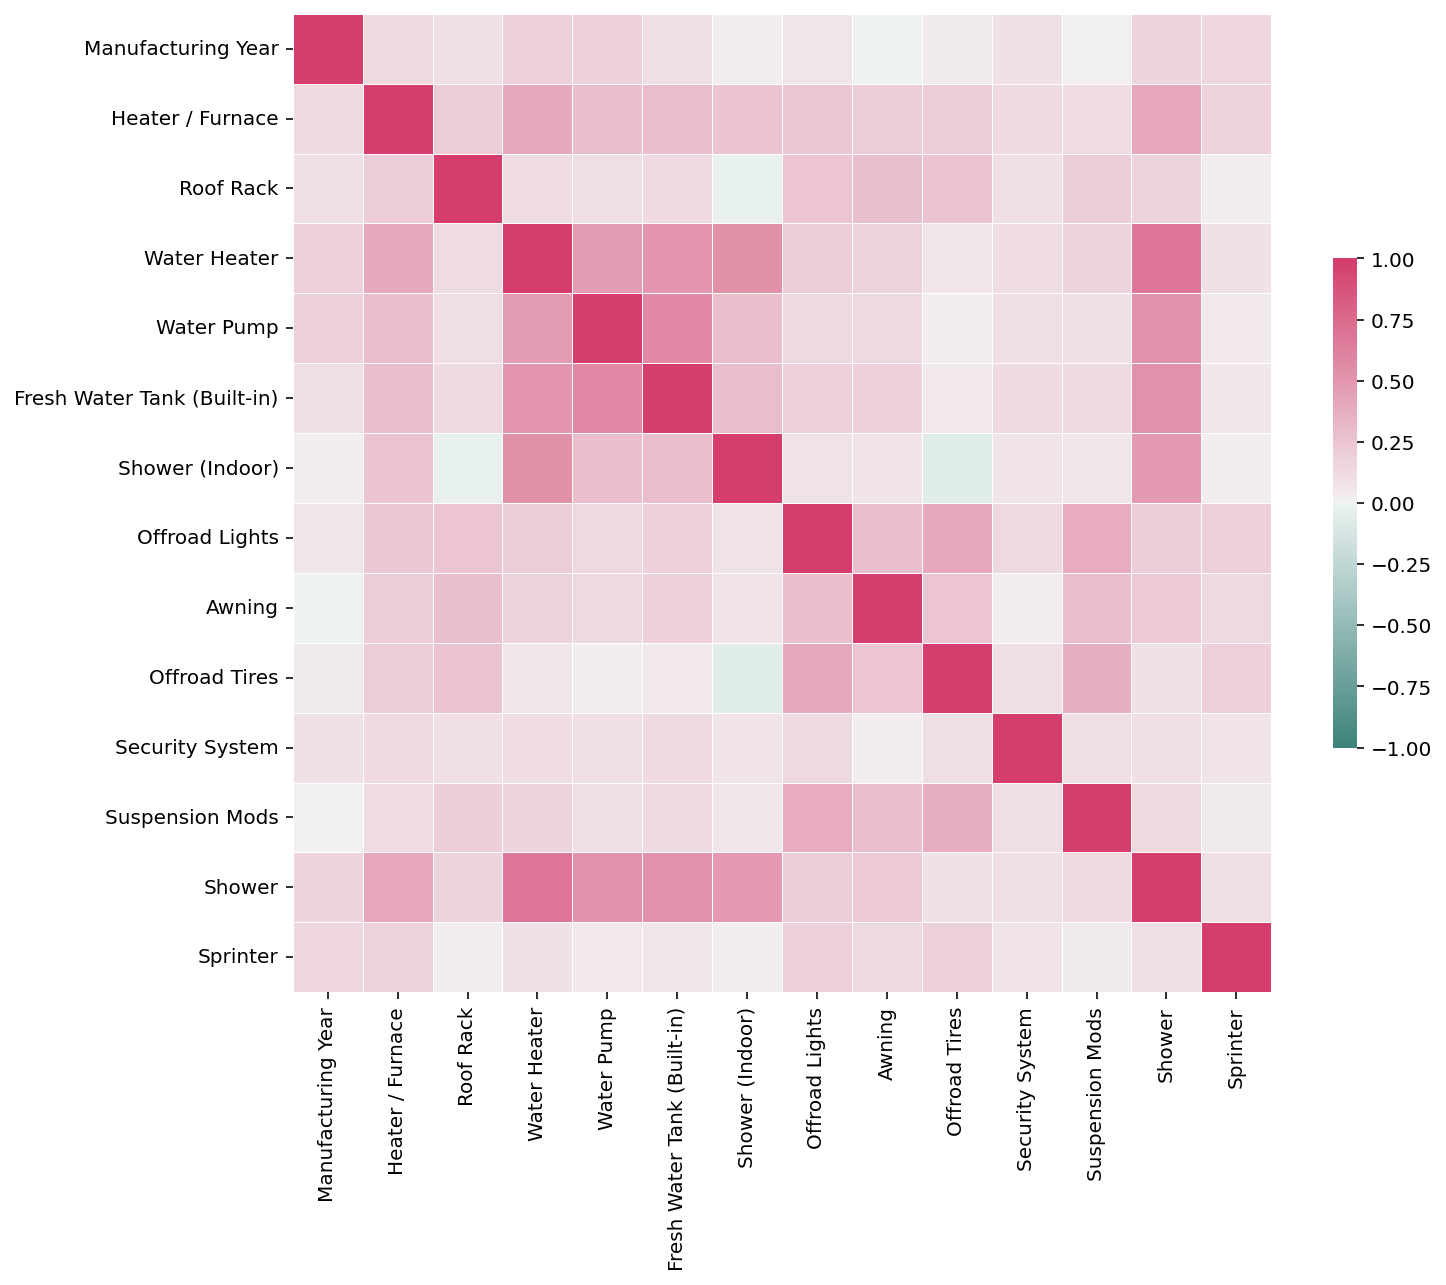

In [129]:
correlation = x3.corr()

#mask = np.triu(np.ones_like(correlation, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(180, 359, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
# investigate VIF values again

vif2 = pd.DataFrame()
vif2['variable'] = x3.columns
vif2['vif'] =[variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif2

,variable,vif
0,Manufacturing Year,5.259416
1,Heater / Furnace,2.775310
2,Roof Rack,1.926433
3,Water Heater,4.264211
4,Water Pump,6.594645
5,Fresh Water Tank (Built-in),4.680379
6,Shower (Indoor),2.042168
7,Offroad Lights,1.766513
8,Awning,1.597079
9,Offroad Tires,2.121147


In [36]:
model3 = sm.OLS(y2,x3)
vans_model3 = model3.fit()
vans_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              315.6
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                   4.28e-260
Time:                        12:59:50   Log-Likelihood:                         -6997.9
No. Observations:                 593   AIC:                                  1.402e+04
Df Residuals:                     579   BIC:                                  1.409e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Manufacturing Year             15.4530      1.526     10.125      0.000      12.455      18.451
Heater / Furnace             8469.9425   3120.400      2.714      0.007    2341.259    1.46e+04
Roof Rack                    9606.1243   3008.537      3.193      0.001    3697.148    1.55e+04
Water Heater                 1.626e+04   4089.086      3.977      0.000    8229.163    2.43e+04
Water Pump                   1.286e+04   3993.630      3.221      0.001    5020.231    2.07e+04
Fresh Water Tank (Built-in)  6784.7313   3658.285      1.855      0.064    -400.394     1.4e+04
Shower (Indoor)              1.054e+04   3773.040      2.794      0.005    3132.012     1.8e+04
Offroad Lights               9429.7268   3946.000      2.390      0.017    1679.508    1.72e+04
Awning                       8809.0081   3552.121      2.480      0.013    1832.396    1.58e+04
Offroad Tires                4847.3237   3322.002      1.459      0.145   -1677.319    1.14e+04
Security System              8621.1833   3348.432      2.575      0.010    2044.630    1.52e+04
Suspension Mods              1.109e+04   4067.427      2.726      0.007    3100.551    1.91e+04
Shower                        322.8076   4187.206      0.077      0.939   -7901.156    8546.771
Sprinter                     2.751e+04   2869.927      9.586      0.000    2.19e+04    3.31e+04
==============================================================================
Omnibus:                       11.974   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.119
Skew:                           0.332   Prob(JB):                      0.00234
Kurtosis:                       3.221   Cond. No.                     7.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# split the data 80/20 

x3, X3_test, y2, Y3_test = train_test_split(x3, y2, test_size=.2, random_state=42)

# fit model to training set

model3 = LinearRegression()
lr3 = model3.fit(x3,y1)

r_squared_train3 = lr3.score(x3, y1)
r_squared_test3 = lr3.score(X3_test, Y3_test)

print(f'R^2 for the training data is {r_squared_train3}')
print(f'R^2 for the test data is {r_squared_test3}')
print(f'The difference is {r_squared_train3 - r_squared_test3}.')

R^2 for the training data is 0.6600306978362376
R^2 for the test data is 0.542609462300909
The difference is 0.11742123553532857.


# Is Ridge Regression the way?

In [41]:
nalphas = 4000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(x1.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(x1,y1)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

/home/mattiboi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mattiboi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mattiboi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

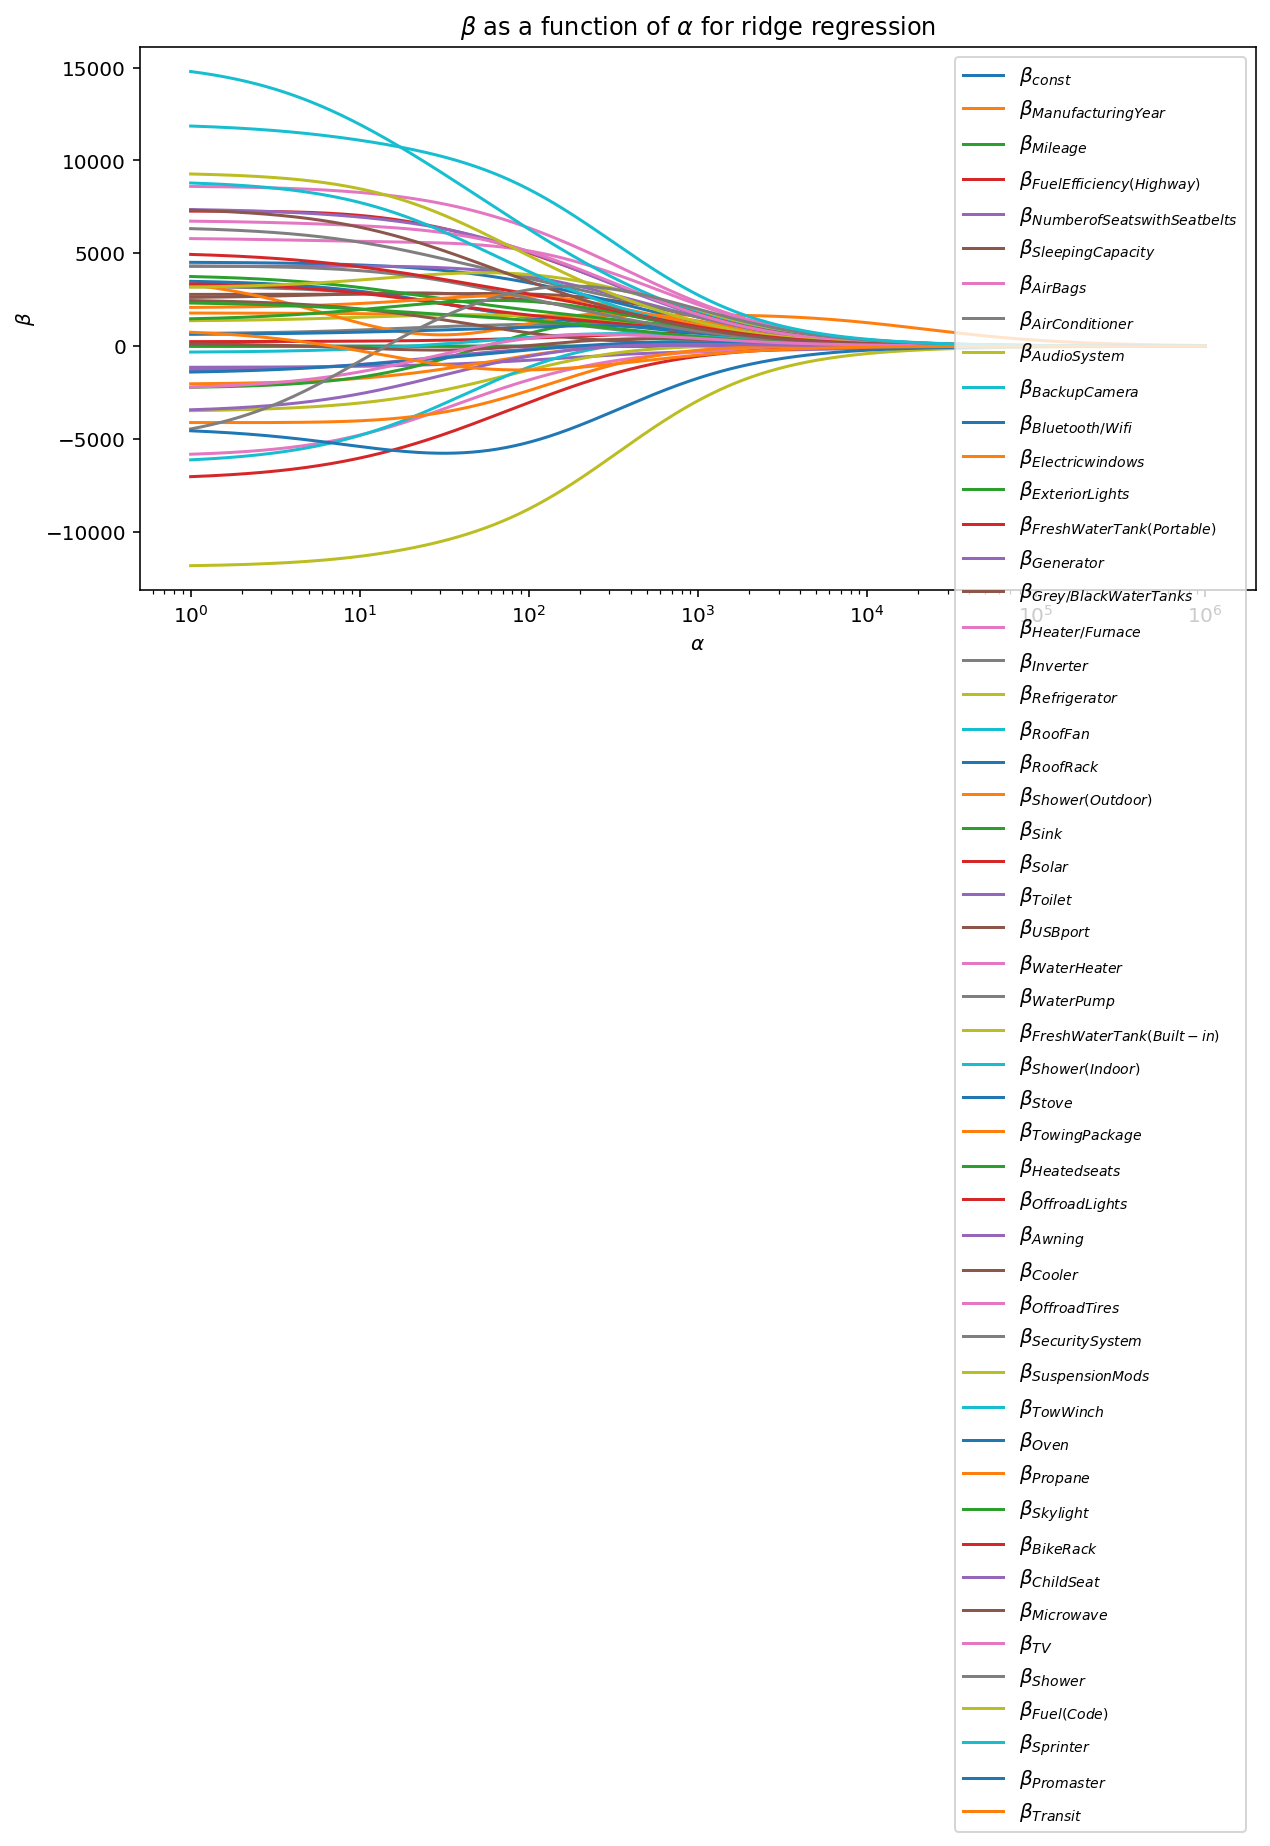

In [42]:
columns = list(x1.columns)
fig, ax = plt.subplots(figsize=(10,5))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [44]:
# ridge on all of the data

X_train3, X_test3, y_train3, y_test3 = train_test_split(x1, y1, test_size=0.2,random_state=42)

## .fit finds the mean and standard deviation of each variable in the training set
std3 = StandardScaler()
std3.fit(X_train3.values)

## apply the scaler to the train set
X_tr3 = std3.transform(X_train3.values)

## Apply the scaler to the test set
X_te3 = std2.transform(X_test3.values)
ridge = Ridge(alpha = 5000)
ridge.fit(X_tr3, y_train3)
test_r_squared3 = ridge.score(X_te3, y_test3)
print(test_r_squared3)
features_to_use2 = (list(zip(X_train3.columns, ridge.coef_)))

0.2985551041877941


In [46]:
bool_cols = [col for col in vans 
             if np.isin(vans[col].dropna().unique(), [0, 1]).all()]

In [47]:
bool_cols

['Air Bags',
 'Air Conditioner',
 'Audio System',
 'Backup Camera',
 'Bluetooth / Wifi',
 'Electric windows',
 'Exterior Lights',
 'Fresh Water Tank (Portable)',
 'Generator',
 'Grey / Black Water Tanks',
 'Heater / Furnace',
 'Inverter',
 'Refrigerator',
 'Roof Fan',
 'Roof Rack',
 'Shower (Outdoor)',
 'Sink',
 'Solar',
 'Toilet',
 'USB port',
 'Water Heater',
 'Water Pump',
 'Fresh Water Tank (Built-in)',
 'Shower (Indoor)',
 'Stove',
 'Towing Package',
 'Heated seats',
 'Offroad Lights',
 'Awning',
 'Cooler',
 'Offroad Tires',
 'Security System',
 'Suspension Mods',
 'Tow Winch',
 'Oven',
 'Propane',
 'Skylight',
 'Bike Rack',
 'Child Seat',
 'Microwave',
 'TV',
 'Shower',
 'Sprinter',
 'Promaster',
 'Transit']

In [90]:
bool_counts = vans[bool_cols].sum()

type(bool_counts)
type(bool_cols)

bools_dict = {}

for i in range(len(bool_cols)):
    bools_dict[bool_cols[i]] = bool_counts[i]

In [106]:
#for k,v in bools_dict.items():
  #  print(type(v))
    
bools_dict    

{'Air Bags': 539,
 'Air Conditioner': 385,
 'Audio System': 484,
 'Backup Camera': 496,
 'Bluetooth / Wifi': 406,
 'Electric windows': 459,
 'Exterior Lights': 246,
 'Fresh Water Tank (Portable)': 276,
 'Generator': 38,
 'Grey / Black Water Tanks': 386,
 'Heater / Furnace': 304,
 'Inverter': 471,
 'Refrigerator': 481,
 'Roof Fan': 474,
 'Roof Rack': 227,
 'Shower (Outdoor)': 270,
 'Sink': 489,
 'Solar': 472,
 'Toilet': 308,
 'USB port': 505,
 'Water Heater': 272,
 'Water Pump': 441,
 'Fresh Water Tank (Built-in)': 373,
 'Shower (Indoor)': 153,
 'Stove': 349,
 'Towing Package': 239,
 'Heated seats': 92,
 'Offroad Lights': 121,
 'Awning': 135,
 'Cooler': 152,
 'Offroad Tires': 205,
 'Security System': 127,
 'Suspension Mods': 103,
 'Tow Winch': 59,
 'Oven': 74,
 'Propane': 220,
 'Skylight': 68,
 'Bike Rack': 85,
 'Child Seat': 37,
 'Microwave': 74,
 'TV': 81,
 'Shower': 353,
 'Sprinter': 231,
 'Promaster': 152,
 'Transit': 92}

In [101]:
counts_df = pd.DataFrame([bools_dict])
counts_df.head()

<AxesSubplot:xlabel='Air Bags', ylabel='Count'>

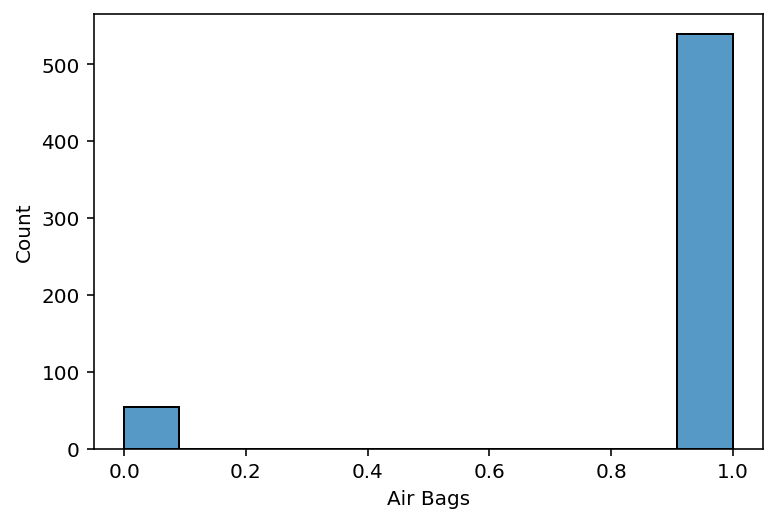

In [120]:
sns.histplot(vans[bool_cols[0]])

<AxesSubplot:ylabel='Count'>

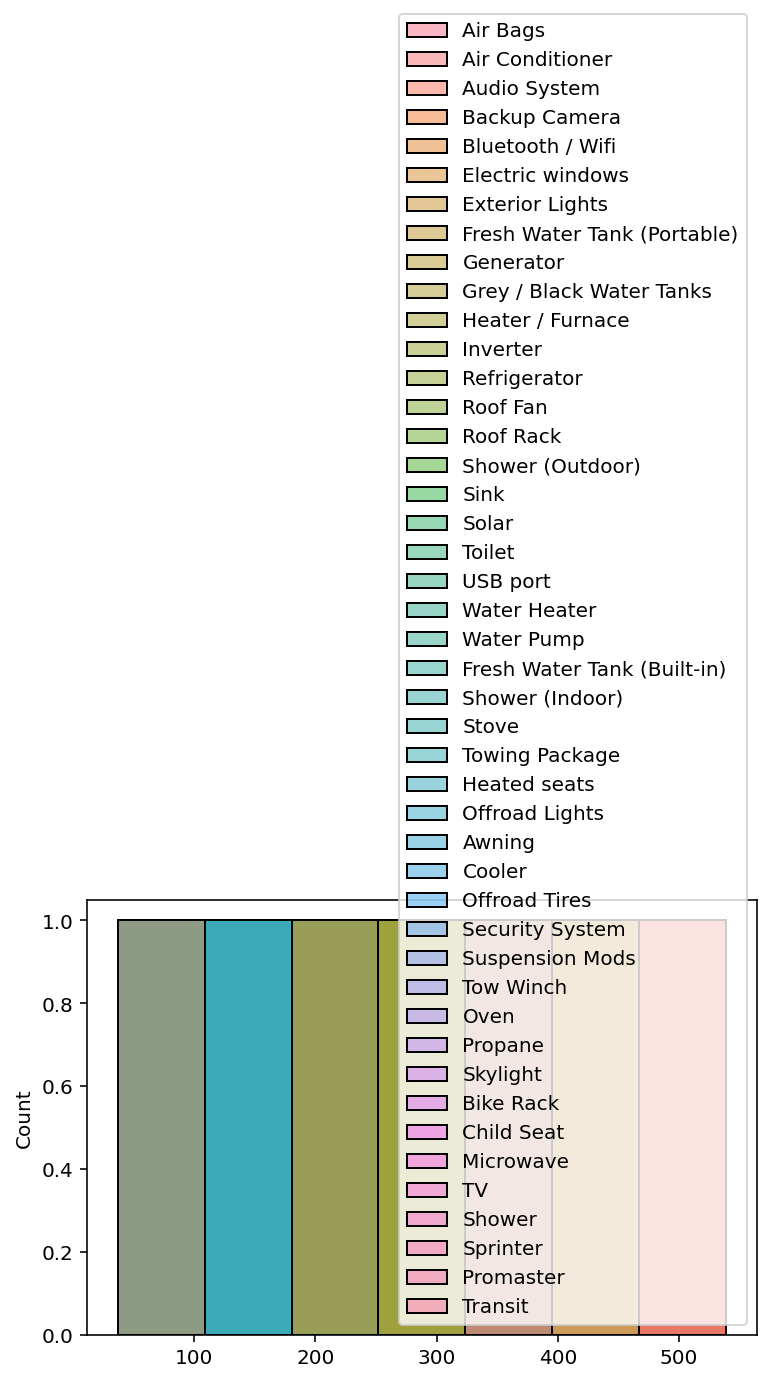

In [113]:
#sns.histplot(counts_df)